The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dataset/boston_housing.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


CRIM: Per capita crime rate by town <br/>
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft <br/>
INDUS: Proportion of non-retail business acres per town <br/>
CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise) <br/>
NOX: Nitric oxide concentration (parts per 10 million) <br/>
RM: Average number of rooms per dwelling <br/>
AGE: Proportion of owner-occupied units built prior to 1940 <br/>
DIS: Weighted distances to five Boston employment centers <br/>
RAD: Index of accessibility to radial highways <br/>
PTRATIO: Pupil-teacher ratio by town B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town <br/>
LSTAT: Percentage of lower status of the population <br/>
MEDV: Median value of owner-occupied homes in $1000s -> target

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
data.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.00,486.00,486.00,486.00,506.00,506.00,486.00,506.00,506.00,506.00,506.00,506.00,486.00,506.00
mean,3.61,11.21,11.08,0.07,0.55,6.28,68.52,3.80,9.55,408.24,18.46,356.67,12.72,22.53
std,8.72,23.39,6.84,0.26,0.12,0.70,28.00,2.11,8.71,168.54,2.16,91.29,7.16,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.18,2.10,4.00,279.00,17.40,375.38,7.12,17.02
50%,0.25,0.00,9.69,0.00,0.54,6.21,76.80,3.21,5.00,330.00,19.05,391.44,11.43,21.20
75%,3.56,12.50,18.10,0.00,0.62,6.62,93.98,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [5]:
data = data.fillna(data.mean())

We have a lot of outliers in our data; to treat outliers we will use StandardScaler()

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,MaxAbsScaler,RobustScaler
num_col = data.describe(exclude='O').columns.tolist()
scaler = StandardScaler()
data[num_col] = scaler.fit_transform(data[num_col])
scaler = MinMaxScaler()
data[num_col] = scaler.fit_transform(data[num_col])
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,0.040526,0.096052,0.0,0.000865,0.003191,0.040526,1.0
ZN,506.0,0.112119,0.229211,0.0,0.000000,0.000000,0.112119,1.0
INDUS,506.0,0.389443,0.245571,0.0,0.173387,0.346041,0.646628,1.0
CHAS,506.0,0.069959,0.250233,0.0,0.000000,0.000000,0.000000,1.0
NOX,506.0,0.349167,0.238431,0.0,0.131687,0.314815,0.491770,1.0
RM,506.0,0.521869,0.134627,0.0,0.445392,0.507281,0.586798,1.0
AGE,506.0,0.675783,0.282590,0.0,0.443100,0.736869,0.933831,1.0
DIS,506.0,0.242381,0.191482,0.0,0.088259,0.188949,0.369088,1.0
RAD,506.0,0.371713,0.378576,0.0,0.130435,0.173913,1.000000,1.0
TAX,506.0,0.422208,0.321636,0.0,0.175573,0.272901,0.914122,1.0


<AxesSubplot:>

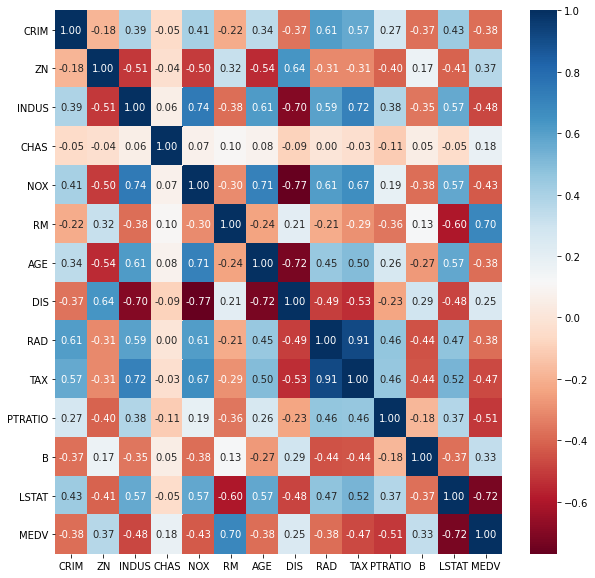

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), cmap='RdBu', annot=True, fmt=".2f")

In [8]:
from sklearn.model_selection import train_test_split
X = data.drop('MEDV', axis=1)
Y = data['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)

In [9]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state = 0)
model_rf.fit(X_train, Y_train)
y_pred_rf = model_rf.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error
print("MSE_rf:", mean_squared_error(Y_test, y_pred_rf))
print("Accurcy_drf:", model_rf.score(X_test, Y_test))
rmse = (np.sqrt(mean_squared_error(Y_test, y_pred_rf)))
print("RMSE is {}", format(rmse))

MSE_rf: 0.00422358182910981
Accurcy_drf: 0.9066848391781644
RMSE is {} 0.06498909007756463
